Correlation between experience and designation: -0.5759470099849141
Correlation between age and designation: -0.31362200080423697
Accuracy of Logistic Regression (Experience): 0.85


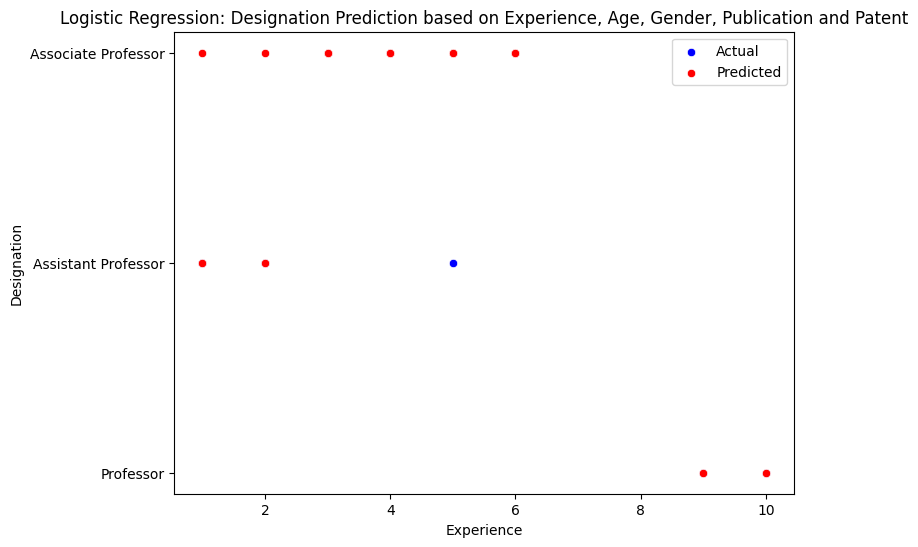

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class FacultyDataGenerator:
    def __init__(self, seed=42):
        np.random.seed(seed)

    def generate_faculty_data(self, num_records):
        faculty_ids = range(1, num_records + 1)
        names = [f"Faculty {i}" for i in faculty_ids]
        experience = np.random.normal(loc=5, scale=3, size=num_records).astype(int)
        experience = np.clip(experience, 1, 15)

        # Introduce randomness into designation generation by adding noise
        designations = []
        for exp in experience:
            if exp <= 2:
                designations.append("Assistant Professor")
            elif exp <= 7:
                designations.append("Associate Professor")
            else:
                designations.append("Professor")

        # Randomize 20% of the designations to introduce overlap
        random_indices = np.random.choice(range(num_records), size=int(0.2 * num_records), replace=False)
        for i in random_indices:
            designations[i] = np.random.choice(["Assistant Professor", "Associate Professor", "Professor"])

        salaries = []
        for exp, des in zip(experience, designations):
            base_salary = 60000 + (exp * 3000)
            if des == "Associate Professor":
                base_salary += 10000
            elif des == "Professor":
                base_salary += 25000
            salaries.append(int(base_salary + np.random.normal(loc=0, scale=5000)))

        publications = experience * 2 + np.random.normal(loc=0, scale=2, size=num_records)
        publications = np.clip(publications, 0, 50).astype(int)

        patents = publications // 3 + np.random.normal(loc=0, scale=1, size=num_records)
        patents = np.clip(patents, 0, 20).astype(int)

        genders = np.random.choice([0,1], size=num_records)

        data = {
            'Faculty ID': faculty_ids,
            'Name': names,
            'Experience': experience,
            'Designation': designations,
            'Salary': salaries,
            'Publications': publications,
            'Patents': patents,
            'Gender': genders
        }
        return pd.DataFrame(data)

    def add_designation_value(self, df):
        designation_mapping = {
            "Professor": 1,
            "Associate Professor": 2,
            "Assistant Professor": 3
        }
        df['Designation_Value'] = df['Designation'].map(designation_mapping)
        return df

# Example usage
generator = FacultyDataGenerator()
faculty_df = generator.generate_faculty_data(100)
faculty_df = generator.add_designation_value(faculty_df)

# Calculate Age more realistically: Age = Experience + Random offset between 25 and 50
faculty_df['Age'] = faculty_df['Experience'] + np.random.randint(25, 51, size=len(faculty_df))

experience_designation_correlation = faculty_df['Experience'].corr(faculty_df['Designation_Value'])
print(f"Correlation between experience and designation: {experience_designation_correlation}")
age_designation_correlation = faculty_df['Age'].corr(faculty_df['Designation_Value'])
print(f"Correlation between age and designation: {age_designation_correlation}")

# Logistic Regression for Designation Prediction based on Experience
X_exp = faculty_df[['Experience','Age','Gender','Publications','Patents']]
y_exp = faculty_df['Designation']
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)

logreg_exp = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg_exp.fit(X_train_exp, y_train_exp)
y_pred_exp = logreg_exp.predict(X_test_exp)
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
print(f"Accuracy of Logistic Regression (Experience): {accuracy_exp}")

# Plotting Experience vs. Predicted Designation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_exp['Experience'],y= y_test_exp, color='blue', label='Actual')
sns.scatterplot(x=X_test_exp['Experience'],y= y_pred_exp, color='red', label='Predicted')
plt.xlabel('Experience')
plt.ylabel('Designation')
plt.title('Logistic Regression: Designation Prediction based on Experience, Age, Gender, Publication and Patent')
plt.legend()
plt.show()



In [ ]:
num = 1
denom = 0
try:
    res= num/denom
except:
    print("Divide by zero detected")
else:
    print("Result :",res)
finally:
    print("This is executed any way")

Divide by zero detected
This is executed any way


In [ ]:
file = open('example.txt','w')
file.write("Ok Lets Go")

rfile = open('example.txt','r')
content = rfile.read()

print(content)
file.close()
rfile.close()

Ok Lets Go
